In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import joblib

In [48]:
diabetesDF=pd.read_csv('diabetes.csv')
print(diabetesDF.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [49]:
diabetesDF.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


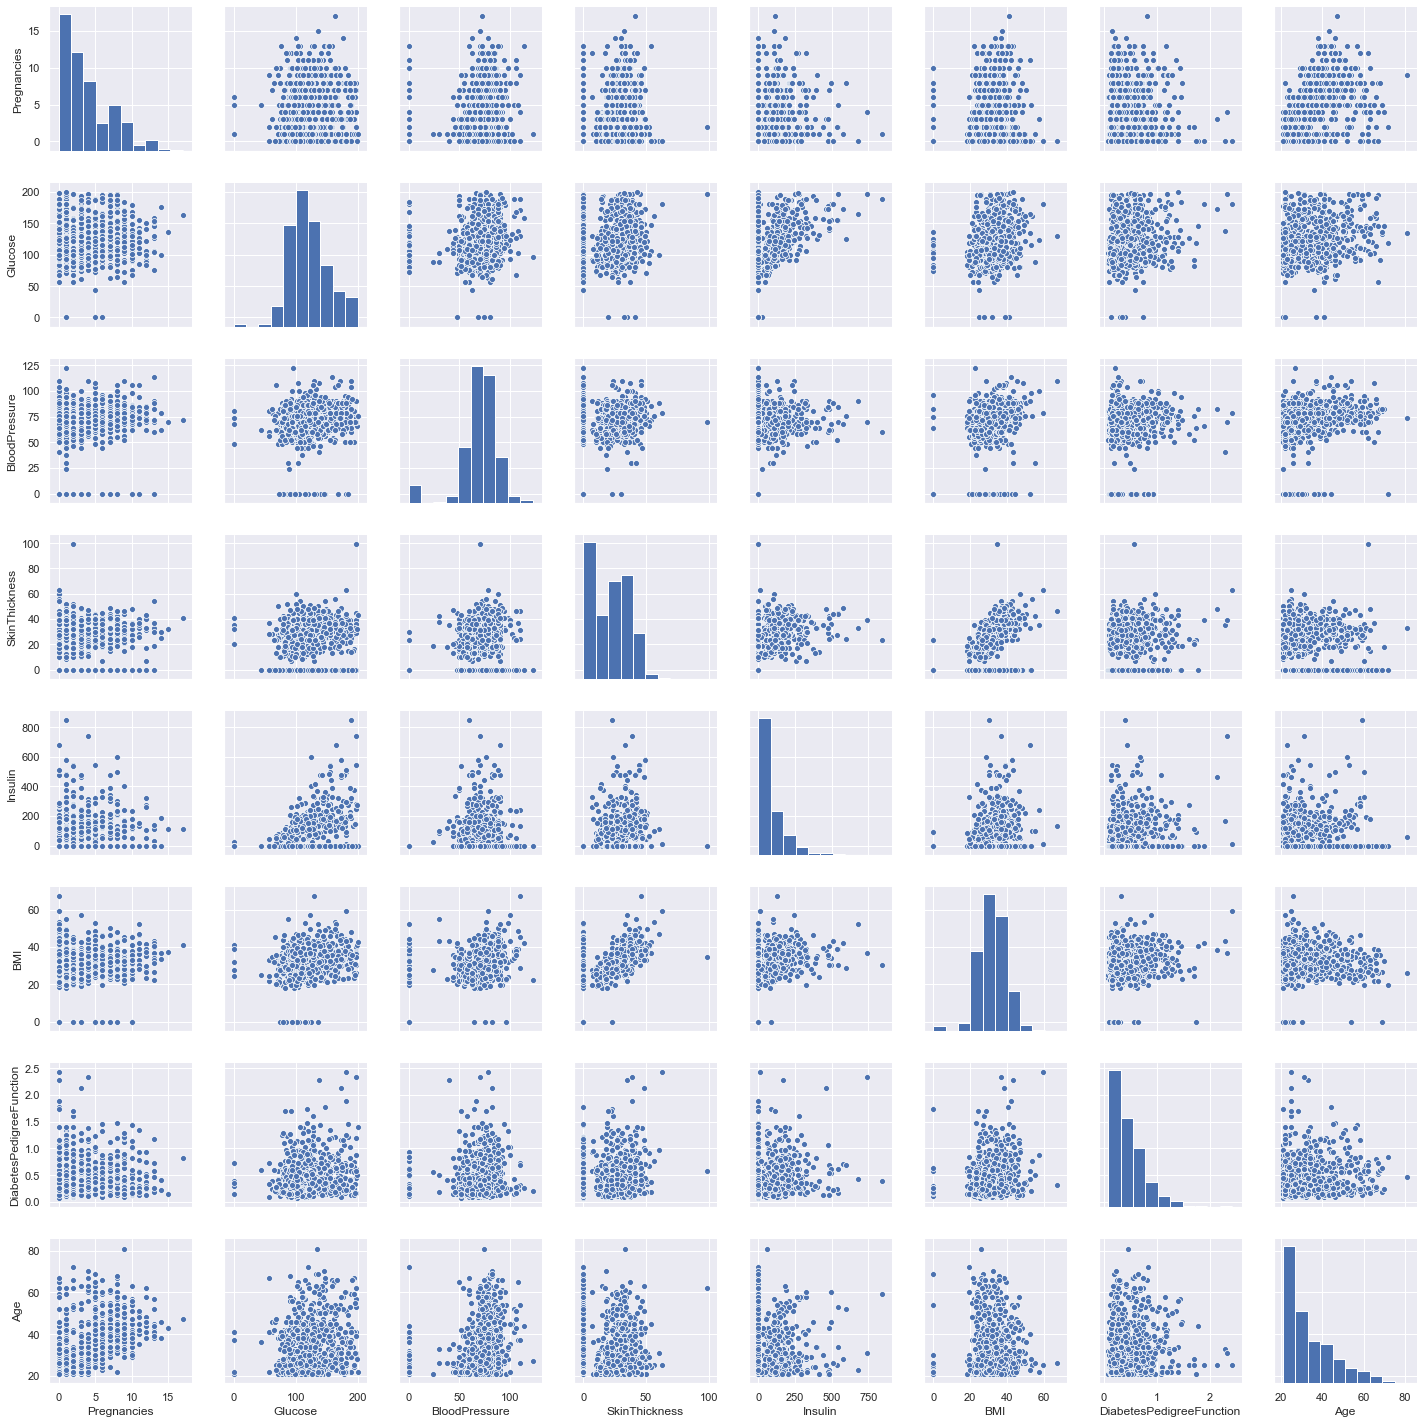

In [50]:
sns.set()
sns.pairplot(diabetesDF, vars = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI",
                                 "DiabetesPedigreeFunction","Age"])
plt.show()

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

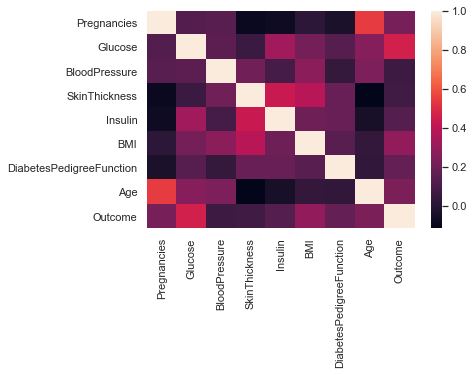

In [51]:
corr=diabetesDF.corr()
print(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [52]:
print("No. of zeroes entires in Blood Pressure: ", diabetesDF[diabetesDF.BloodPressure == 0].shape[0])
print("No. of zeroes entires in Glucose : ", diabetesDF[diabetesDF.Glucose == 0].shape[0])
print("No. of zeroes entires in SkinThickness : ", diabetesDF[diabetesDF.SkinThickness == 0].shape[0])
print("No. of zeroes entires in BMI : ", diabetesDF[diabetesDF.BMI == 0].shape[0])
print("No. of zeroes entires in Insulin : ", diabetesDF[diabetesDF.Insulin == 0].shape[0])

No. of zeroes entires in Blood Pressure:  35
No. of zeroes entires in Glucose :  5
No. of zeroes entires in SkinThickness :  227
No. of zeroes entires in BMI :  11
No. of zeroes entires in Insulin :  374


In [53]:
diabetesDF = diabetesDF[(diabetesDF.BloodPressure != 0) & (diabetesDF.BMI != 0) & (diabetesDF.Glucose != 0)]

feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetesDF[feature_names]
y = diabetesDF.Outcome

In [54]:
dfTrain=diabetesDF[:600]
dfTest=diabetesDF[600:700]
dfCheck=diabetesDF[700:]


In [55]:
trainLabel=np.asarray(dfTrain['Outcome'])
trainData=np.asarray(dfTrain.drop('Outcome',1))
testLabel=np.asarray(dfTest['Outcome'])
testData=np.asarray(dfTest.drop('Outcome',1))

In [56]:
means=np.mean(trainData,axis=0)
stds=np.std(trainData,axis=0)

trainData=(trainData-means)/stds
testData=(testData-means)/stds

In [57]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

In [58]:
names = []
scores = []
for name, model in models:
    model.fit(trainData, trainLabel)
    y_pred = model.predict(testData)
    scores.append(accuracy_score(testLabel, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name  Score
0  KNN   0.77
1  SVC   0.76
2   LR   0.76
3   DT   0.71
4   RF   0.72


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [59]:
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

  Name     Score
0  KNN  0.719787
1  SVC  0.656279
2   LR  0.766781
3   DT  0.703082
4   RF  0.743246


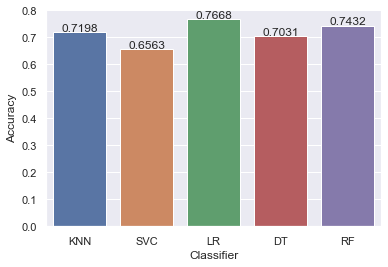

In [60]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [61]:
joblib.dump([models[2][1],means,stds],'diabetesModel1.pkl')

['diabetesModel1.pkl']

In [62]:
 dLm,means,stds=joblib.load('diabetesModel1.pkl')
accuracyModel=dLm.score(testData,testLabel)
print("accuracy=",accuracyModel*100,"%")

accuracy= 76.0 %


In [63]:
print(dfCheck.head())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
744           13      153             88             37      140  40.6   
745           12      100             84             33      105  30.0   
746            1      147             94             41        0  49.3   
747            1       81             74             41       57  46.3   
748            3      187             70             22      200  36.4   

     DiabetesPedigreeFunction  Age  Outcome  
744                     1.174   39        0  
745                     0.488   46        0  
746                     0.358   27        1  
747                     1.096   32        0  
748                     0.408   36        1  


In [64]:
sampleData=dfCheck[:1]
sDF=np.asarray(sampleData.drop('Outcome',1))
sDF=(sDF-means)/stds
pP=dLm.predict_proba(sDF)
prediction=dLm.predict(sDF)
print("Probability:",pP)
print("Prediction:",prediction)

Probability: [[0.05511553 0.94488447]]
Prediction: [1]
